In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from growth.sweep.sweep import Sweep

In [3]:
ls ../simulations/

Sweep_181121_235632/      Sweep_181121_235632 copy/ sweep_pop12_b1/


In [4]:
path = '../simulations/sweep_pop12_b1/'
#path = '../simulations/Sweep_181121_235632/'
sweep = Sweep.load(path)

In [5]:
import matplotlib.pyplot as plt

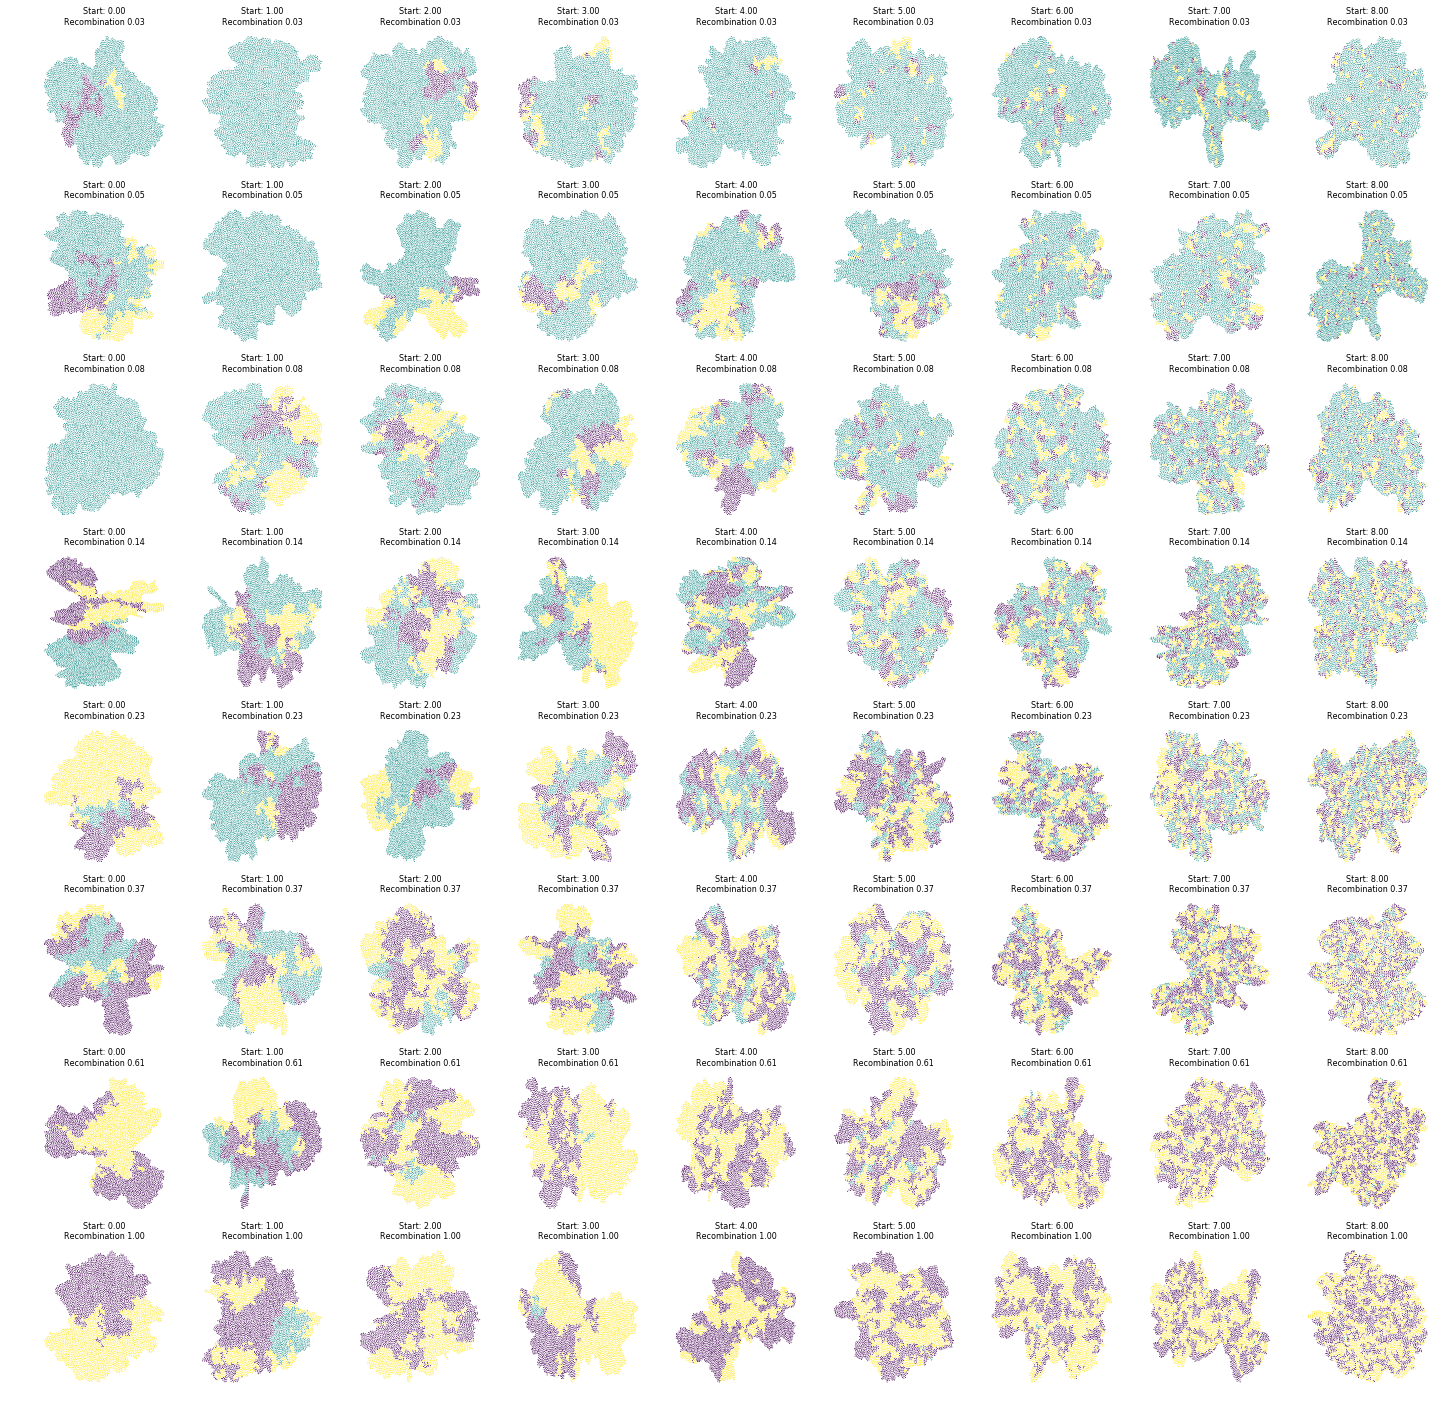

In [7]:
replicate_id = 0

nrows, ncols = sweep.grid[0].shape
row_size = nrows * sweep.batch_size
col_size = sweep.batch_size

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))

ax_id = 0
for index in range(sweep.N):
    if (index % sweep.batch_size) != replicate_id:
        continue
    
    # load simulation
    sim = sweep[index]

    # plot culture
    ax = axes.flatten()[ax_id]
    sim.plot(ax=ax, s=1)

    #start_point = sim.recombination_start / sim.final_population
    ax.set_title('Start: {:0.2f}\nRecombination {:0.2f}'.format(sim.recombination_start, sim.recombination), fontsize=8)
    ax.axis('off')

    # increment ax_id
    ax_id += 1

In [34]:
from growth.cells.cultures import Culture, Cell

In [9]:
index = 20
replicate_id = 0
sim = sweep[index*sweep.batch_size+replicate_id]

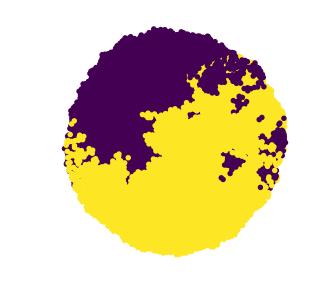

In [10]:
sim.plot()

In [32]:
np.logspace(-5, 0, num=5, base=2)

array([0.03125   , 0.07432544, 0.1767767 , 0.42044821, 1.        ])

In [24]:
sweep.recombination_start

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
import numpy as np

In [11]:
sweep.results['mean_clone_size'] = sweep.results.population / sweep.results.num_clones
sweep.results['start_time'] = sweep.results.recombination_start
df = sweep.results.groupby(['row', 'column']).agg(lambda x: np.mean(x[x!=np.inf])).reset_index()

In [13]:

shape = sweep.grid[0].shape
xx = df.start_time.values.reshape(shape)
yy = df.recombination_rate.values.reshape(shape)
zz_extent = 1-df.percent_heterozygous.values.reshape(shape)
zz_num_clones = df.num_clones.values.reshape(shape)
zz_clone_size = np.log10(df.mean_clone_size.values.reshape(shape))
zz_transclone_edges = df.transclone_edges.values.reshape(shape)
zz_clone_size_variation = df.clone_size_variation.values.reshape(shape)

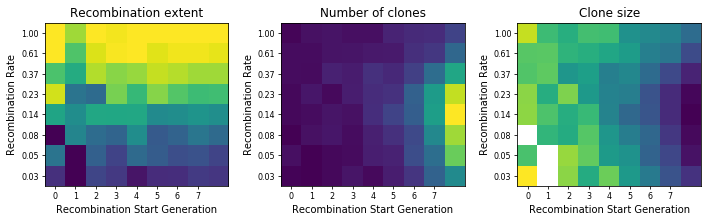

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 3))
ax0.imshow(zz_extent, cmap=plt.cm.viridis)
ax0.set_title('Recombination extent')
ax1.imshow(zz_num_clones, cmap=plt.cm.viridis)
ax1.set_title('Number of clones')
ax2.imshow(zz_clone_size, cmap=plt.cm.viridis)
ax2.set_title('Clone size')

for ax in (ax0, ax1, ax2):

    _ = ax.set_xticks(np.arange(sweep.density))
    _ = ax.set_yticks(np.arange(sweep.density))
    
    ax.invert_yaxis()
    ax.set_xlabel('Recombination Start Generation')
    ax.set_ylabel('Recombination Rate')
    _ = ax.set_xticklabels(['{:d}'.format(int(l)) for l in xx[0]]+[''], rotation=0)
    _ = ax.set_yticklabels(['{:.2f}'.format(l) for l in yy[:,0]])
    ax.tick_params(labelsize=8, length=3, pad=3)

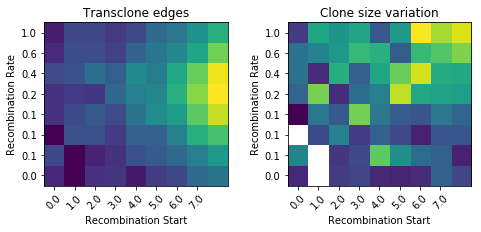

In [15]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))
ax0.imshow(zz_transclone_edges, cmap=plt.cm.viridis)
ax0.set_title('Transclone edges')
ax1.imshow(zz_clone_size_variation, cmap=plt.cm.viridis)
ax1.set_title('Clone size variation')

for ax in (ax0, ax1):
    _ = ax.set_xticks(np.arange(sweep.density))
    _ = ax.set_yticks(np.arange(sweep.density))
    
    ax.invert_yaxis()
    ax.set_xlabel('Recombination Start')
    ax.set_ylabel('Recombination Rate')
    _ = ax.set_xticklabels(['{:0.1f}'.format(l) for l in xx[0]]+[''], rotation=45)
    _ = ax.set_yticklabels(['{:0.1f}'.format(l) for l in yy[:,0]])

In [ ]:
"""
Want to test:
    1. Heterogeneity/Mixing
    2. Fluorescence spectral overlap

METRICS:
    1. mean size of a connected component
    2. number of connected components
    3. % heterogeneous


A: Plot heatmaps of each metric for growth vs recombination rate


"""

In [144]:
import sys
p = '../clones_dev/'
if p not in sys.path:
    sys.path.insert(0, p)

In [145]:
from clones.spatial.graphs import Graph

ModuleNotFoundError: No module named 'infomap'

# Simulation video

In [75]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [76]:
# play video
HTML(genotype_video)

AttributeError: 'Fluorescence' object has no attribute 'support'

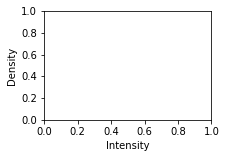

In [161]:
culture.fluorescence.show_pdf()

In [160]:
culture = culture.branch()

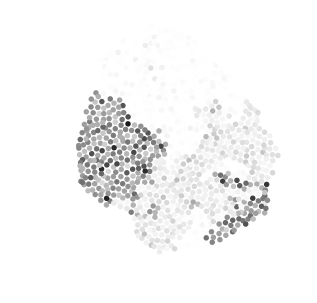

In [31]:
culture.freeze(-1).plot(colorby='phenotype', cmap=plt.cm.Greys)

In [26]:
phylogeny = culture.phylogeny

In [ ]:
# sweep fluorecence functions (can permute with growth)

In [ ]:
colony size

colony heterogeneity (recombination rate)

In [32]:
ls

development.ipynb


In [162]:
import scipy.stats as st

In [191]:
from growth.fluorescence import Fluorescence

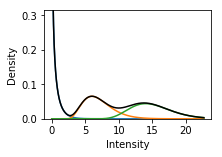

In [211]:
fluor = Fluorescence(shape=(0.5, 5, 10), loc=(0, 2, 5), density=100000)
fluor.show_pdf()

In [64]:
branch = culture.freeze(25)

In [67]:
from ete3 import Tree, TreeStyle

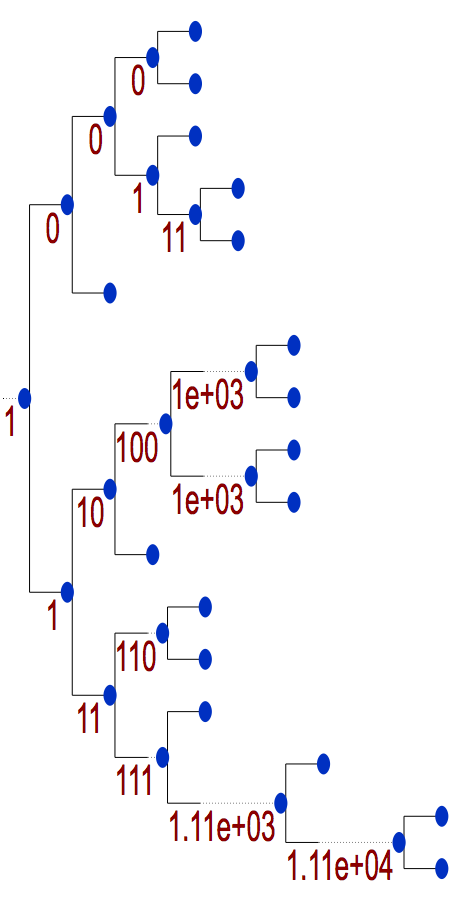

In [84]:
t = Tree(branch.phylogeny.newick)
#t.populate(10, random_branches=True)
ts = TreeStyle()
ts.show_leaf_name = False
ts.scale = 10
ts.show_scale = False
ts.min_leaf_separation = 10
ts.show_branch_support = True

#ts.scale =  10 # 120 pixels per branch length unit
t.render("%%inline", tree_style=ts, h=10, w=5, units='in')

In [19]:
for sim in sweep.load_batch(0):
    sim

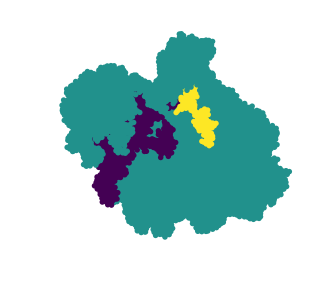

In [21]:
sim.plot()

In [23]:
x = np.arange(46)

In [32]:
b = 10

[np.arange(i*b, i*b+b) for i in range(1+x.size//b)]

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])]